In [9]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [6]:
df = pd.read_csv('trainingdata.txt', names=['charge', 'discharge'])

In [7]:
df.head(5)

,charge,discharge
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


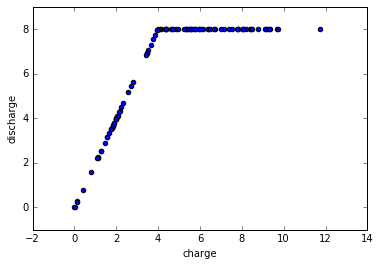

In [10]:
df.plot.scatter(x='charge', y='discharge')

In [110]:
df['func'] = df['charge'].apply(lambda x: 8 - 8 * math.exp(-x * x/5.0))

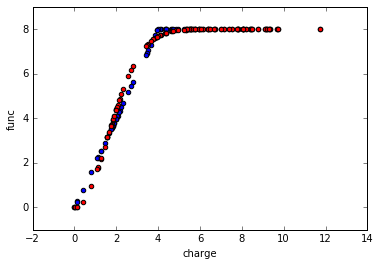

In [111]:
ax = df.plot.scatter(x='charge', y='discharge')
df.plot.scatter(x='charge', y='func', ax=ax, color="red")

In [112]:
df['error'] = abs(df['func'] - df['discharge'])

In [116]:
df['error'].mean()

0.17365079926900029

In [147]:
lines = open('doc_trainingdata.txt', 'r').readlines()

In [186]:
from random import sample
from math import log
size = int(lines[0].strip())
training_size = int(0.9 * size)
samples = sample([i for i in range(size)], training_size)

In [185]:
docs = [[{}, 0] for i in range(8)]
training_data = [0 for _ in xrange(size)]
for c in samples[1:]:
    s = lines[c].lower()
    cat = int(s[0]) - 1
    docs[cat][1] += 1
    words = s[1:].strip().split(" ")
    for word in words:
        word = word.strip()
        if len(word) == 0:
            continue
        if word not in docs[cat][0]:
            docs[cat][0][word] = 0
        docs[cat][0][word] += 1
    training_data[c] = 1

total = sum(map(lambda x: x[1], docs)) + len(docs)
for doc in docs:
    doc[1] = (doc[1] + 1.0) / total
    words = doc[0]
    wordc = sum(doc[0].itervalues()) + len(doc[0])
    for (k, v) in doc[0].iteritems():
        doc[0][k] = (doc[0][k] + 1.0) / wordc
    doc.append(wordc)
correct = 0
for i in range(size):
    if training_data[i] == 1:
        continue
    s = lines[i].lower()
    cat = int(s[0]) - 1
    words = s[1:].strip().split(" ")
    prob = [0 for j in xrange(8)]
    for ct in range(8):
        prob[ct] = docs[ct][1]
        for word in words:
            word = word.strip()
            if len(word) == 0:
                continue
            prob[ct] = prob[ct] * (1.0 / docs[ct][2] if word not in docs[ct][0] else docs[ct][0][word])
    if prob.index(max(prob)) == cat:
        correct += 1

print (correct, size - len(samples))

(1207, 1646)


In [347]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
from math import log
lines = open('doc_trainingdata.txt').readlines()
n = int(lines[0].strip())
words_prob = {}
for i in xrange(n):
    s = lines[i]
    cat = int(s[0]) - 1
    words = s[1:].strip().split(" ")
    for word in words:
        word = word.strip()
        if len(word) == 0:
            continue
        if word not in words_prob:
            words_prob[word] = [0.13 for _ in range(8)]
        words_prob[word][cat] += 1
            
docs_pd = [0 for i in xrange(8)]
words_pd = {}
total = 0.0
for word in words_prob:
    total += sum(words_prob[word])

for word in words_prob:
    prob = words_prob[word]
    for i in xrange(8):
        prob[i] /= total
        docs_pd[i] += prob[i]
    words_pd[word] = sum(prob)
lines = open("testtxt.txt").readlines()
T = int(lines[0].strip())
outputs = open("output01.txt").readlines()
correct = 0
for (text, output) in zip(lines[1:], outputs):
    words = text.strip().split(" ")
    prob = [1.0 for j in xrange(8)]
    last_word = None
    for word in words:
        word = word.strip()
        if len(word) == 0 or word not in words_pd:
            continue
        for j in xrange(8):
            prob[j] = prob[j] * words_prob[word][j] / words_pd[word] / docs_pd[j]
    guess = prob.index(max(prob)) + 1
    if guess == int(output.strip()):
        correct += 1
print correct, len(outputs)

2106 2189


In [344]:
(2106 * 2 - 2189) / 2189.0

0.9241662859753312

In [ ]:
build